# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set units and create empty list for dataframe
units = 'imperial'
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Print initial log message
print("Beginning Data Retrieval")
print("-----------------------------------")

for i in range(len(cities)):
    
    #Adjust city_name to be able to search 
    city_name = cities[i]
    city_url = city_name.replace(" ", "+")
    
    #Set and request url
    url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&q={city_url}&appid={api_key}"
    response = requests.get(url).json()
    
    #Print Log while processing
    print(f"Processing Record {(i+1)%50} of Set {(i+51)//50} | {city_name}")
    print(url)
    
    #Columns need for dataframe
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city.append(city_name)
        
    #Skip if city is not found
    except:
        print("City not found. Skipping...")
        pass

#Print complete message once for loop is complete    
print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=ponta+do+sol&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=punta+arenas&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 3 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=hermanus&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 4 of Set 1 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=verkhoyansk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=rikitea&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 6 of Set 1 | skagastrond
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=skagastrond&appid=ea2c5f81d02240d802f45352ff037889
C

Processing Record 5 of Set 2 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=leshukonskoye&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 6 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=port+alfred&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 7 of Set 2 | gisborne
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=gisborne&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 8 of Set 2 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kawalu&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 9 of Set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=butaritari&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 10 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kapaa&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 11 of Set 2 | kaitangata
http://api.openweathermap.org/data

Processing Record 8 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=yellowknife&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 9 of Set 3 | beloha
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=beloha&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 10 of Set 3 | howard springs
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=howard+springs&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 11 of Set 3 | sapa
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=sapa&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 12 of Set 3 | guanica
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=guanica&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 13 of Set 3 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=haverfordwest&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 14 of Set 3 | strelka
http://api.openweathermap.org/

Processing Record 12 of Set 4 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=longyearbyen&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 13 of Set 4 | kalaleh
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kalaleh&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 14 of Set 4 | arrifes
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=arrifes&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 15 of Set 4 | vostok
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=vostok&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 16 of Set 4 | orlik
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=orlik&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 17 of Set 4 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=norman+wells&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 18 of Set 4 | ust-ilimsk
http://api.openweathermap.org/data/2.

Processing Record 17 of Set 5 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=cabedelo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 18 of Set 5 | sribne
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=sribne&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 19 of Set 5 | high rock
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=high+rock&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 20 of Set 5 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=namatanai&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 21 of Set 5 | salekhard
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=salekhard&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 22 of Set 5 | bluff
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bluff&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 23 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5

Processing Record 21 of Set 6 | mackay
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mackay&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 22 of Set 6 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=nikolskoye&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 23 of Set 6 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=ixtapa&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 24 of Set 6 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=port+hedland&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 25 of Set 6 | matay
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=matay&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 26 of Set 6 | ayan
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=ayan&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 27 of Set 6 | port moresby
http://api.openweathermap.org/data/2.5/weather?

Processing Record 25 of Set 7 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=lompoc&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 26 of Set 7 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=barcelos&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 27 of Set 7 | digby
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=digby&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 28 of Set 7 | inirida
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=inirida&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 29 of Set 7 | flinders
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=flinders&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 30 of Set 7 | alice
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=alice&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 31 of Set 7 | kitimat
http://api.openweathermap.org/data/2.5/weather?units=imperia

Processing Record 30 of Set 8 | xam nua
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=xam+nua&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 31 of Set 8 | cranbrook
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=cranbrook&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 32 of Set 8 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=taoudenni&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 33 of Set 8 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=half+moon+bay&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 34 of Set 8 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=pacific+grove&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 35 of Set 8 | banmo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=banmo&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 36 of Set 8 | bubaqu

Processing Record 35 of Set 9 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=srednekolymsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 36 of Set 9 | liverpool
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=liverpool&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 37 of Set 9 | aflao
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=aflao&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 38 of Set 9 | laguna
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=laguna&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 39 of Set 9 | houma
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=houma&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 40 of Set 9 | pontian kecil
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=pontian+kecil&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 41 of Set 9 | hami
http://api.openweathermap.org/data/2.5/

Processing Record 39 of Set 10 | bocas del toro
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bocas+del+toro&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 40 of Set 10 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=coquimbo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 41 of Set 10 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=havre-saint-pierre&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 42 of Set 10 | yirol
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=yirol&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 43 of Set 10 | tres arroyos
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=tres+arroyos&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 44 of Set 10 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mayumba&appid=ea2c5f81d02240d802f45352ff037889
Processing Recor

Processing Record 42 of Set 11 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=gornopravdinsk&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 43 of Set 11 | nanpiao
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=nanpiao&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 44 of Set 11 | bryan
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bryan&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 45 of Set 11 | contamana
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=contamana&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 46 of Set 11 | staromyshastovskaya
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=staromyshastovskaya&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 47 of Set 11 | verkhnyaya toyma
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=verkhnyaya+toyma&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 48 of Set 11 |

Processing Record 44 of Set 12 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=quatre+cocos&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 45 of Set 12 | kuche
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=kuche&appid=ea2c5f81d02240d802f45352ff037889
City not found. Skipping...
Processing Record 46 of Set 12 | wilmington
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=wilmington&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 47 of Set 12 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=solnechnyy&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 48 of Set 12 | quesnel
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=quesnel&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 49 of Set 12 | gambo
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=gambo&appid=ea2c5f81d02240d802f45352ff037889
Processing Record 0 of Set 13 | sibu
http://ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dataframe
city_data = pd.DataFrame({'City': city,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date,
                         'Humidity': humidity,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Wind Speed': wind_speed
                         })

#Export dataframe to csv
city_data.to_csv(output_data_file, index = False, header = True)

#Check count of dataframe
city_data.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Lat           601
Lng           601
Max Temp      601
Wind Speed    601
dtype: int64

In [6]:
#Preview Dataframe
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,20,PT,1606164177,77,32.67,-17.10,64.40,5.82
1,punta arenas,75,CL,1606163880,37,-53.15,-70.92,53.60,20.80
2,hermanus,67,ZA,1606164121,67,-34.42,19.23,62.01,5.01
3,verkhoyansk,100,RU,1606164178,87,67.54,133.38,-13.32,2.35
4,rikitea,97,PF,1606164117,62,-23.12,-134.97,73.62,2.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

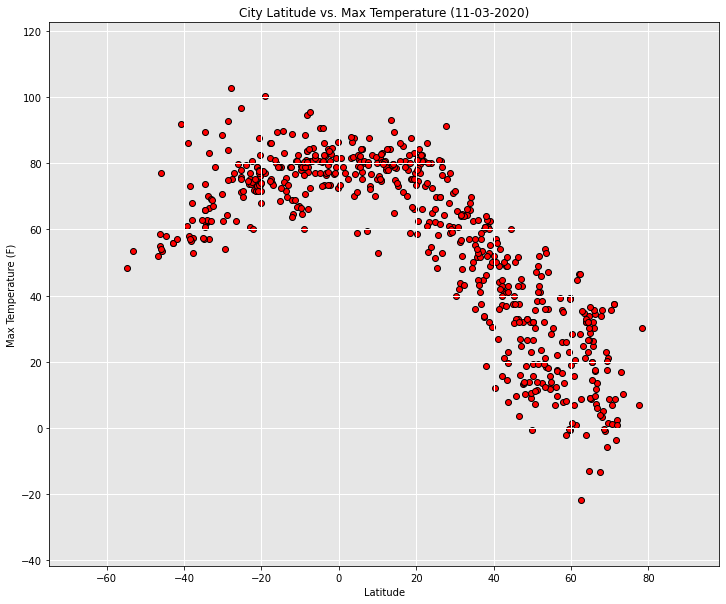

In [7]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Temperature
plt.scatter(city_data['Lat'], city_data['Max Temp'], c = 'red', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Max Temp'])-20, max(city_data['Max Temp'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure1.png")

#Display Graph
plt.show()

#### Latitude vs. Humidity Plot

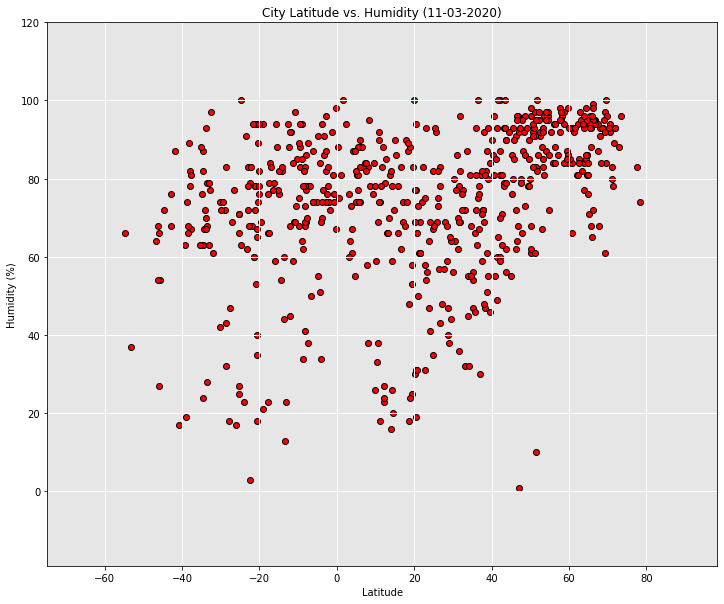

In [8]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Humidity
plt.scatter(city_data['Lat'], city_data['Humidity'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Humidity'])-20, max(city_data['Humidity'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure2.png")

#Display Graph
plt.show()

#### Latitude vs. Cloudiness Plot

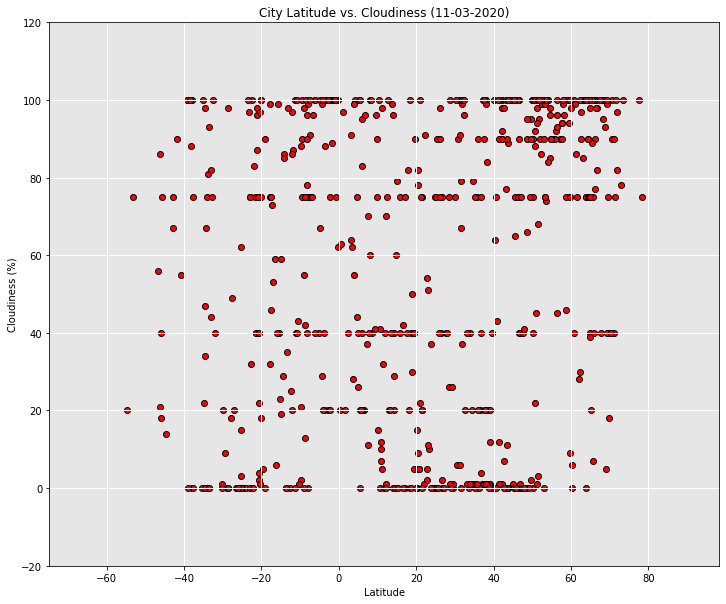

In [9]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Cloudiness
plt.scatter(city_data['Lat'], city_data['Cloudiness'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Cloudiness'])-20, max(city_data['Cloudiness'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Export as PNG
plt.savefig("figure3.png")

#Display Graph
plt.show()

#### Latitude vs. Wind Speed Plot

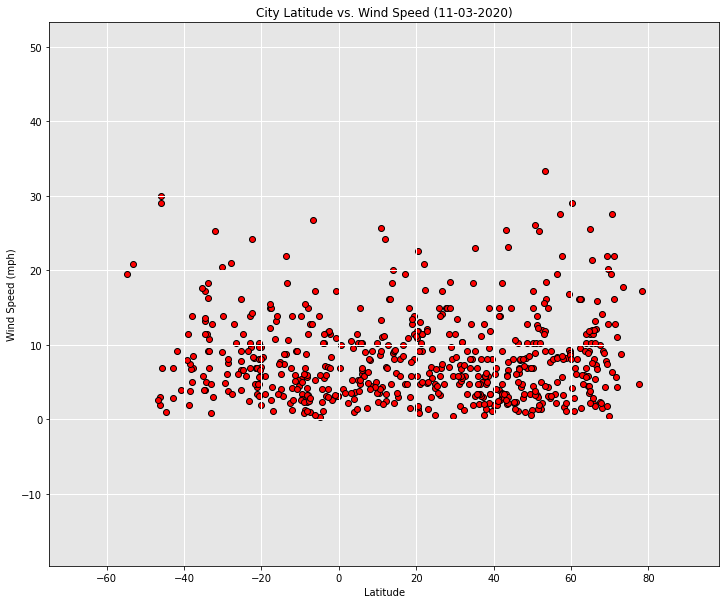

In [10]:
#Set Plot Size
plt.figure(figsize = (12,10))

#Plot Latitude vs. Wind Speed
plt.scatter(city_data['Lat'], city_data['Wind Speed'], c = 'red', edgecolors = 'black')

#Add x-axis and y-axis label and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11-03-2020)")

#Set range of x-axis and y-axis
plt.xlim(min(city_data['Lat'])-20, max(city_data['Lat'])+20)
plt.ylim(min(city_data['Wind Speed'])-20, max(city_data['Wind Speed'])+20)

#Add Grid
plt.grid(True, color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.9')

#Set plot size
plt.plot(figsize = (50,50))

#Export as PNG
plt.savefig("figure4.png")

#Display Graph
plt.show()

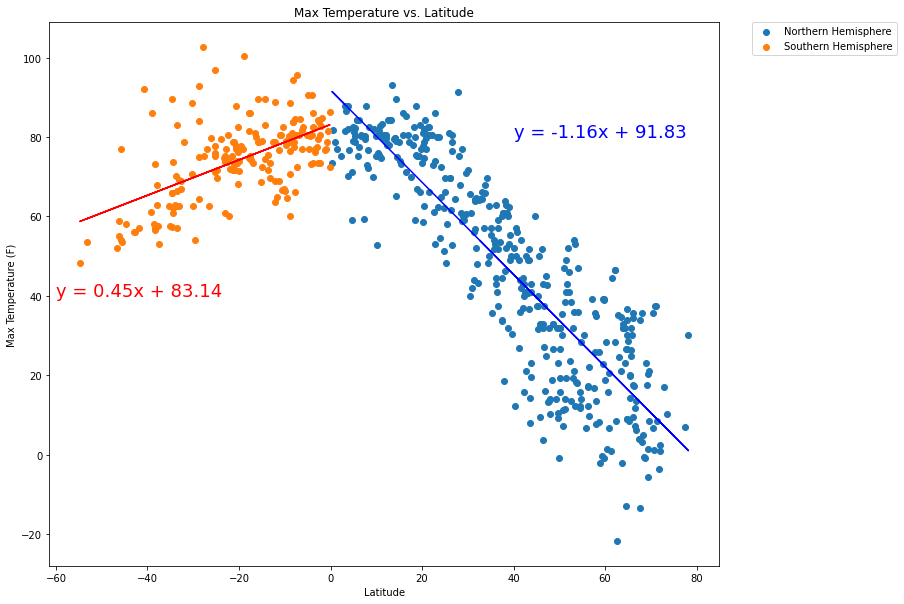

In [28]:
#Regression
from scipy import stats

#Subset data in northern and southern hemisphere
north = city_data.loc[city_data['Lat'] >= 0]
south = city_data.loc[city_data['Lat'] < 0]

#Create Linear Regression
#Temperature
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(north['Lat'], 
                                                              north["Max Temp"])
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(south['Lat'], 
                                                              south["Max Temp"])
#Set x-values and regression values
north_x = north['Lat']
north_y = north_x*slope_n + intercept_n
south_x = south['Lat']
south_y = south_x*slope_s + intercept_s

#Set linear regression equation
north_eq = 'y = ' + str(round(slope_n, 2)) + "x + " + str(round(intercept_n, 2))
south_eq = 'y = ' + str(round(slope_s, 2)) + "x + " + str(round(intercept_s, 2))

#Set Plot Size
plt.figure(figsize = (12,10))

# Create scatter point and add linear regression model on top
plt.scatter(north['Lat'], north["Max Temp"], label = "Northern Hemisphere")
plt.scatter(south['Lat'], south["Max Temp"], label = "Southern Hemisphere")
plt.plot(north_x, north_y, 'b-')
plt.plot(south_x, south_y, 'r-')

# Add linear regression equation
plt.annotate(north_eq, (40, 80), fontsize=18, color='blue')
plt.annotate(south_eq, (-60, 40), fontsize=18, color='red')

# Add title
plt.title("Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Display Plot
plt.show()


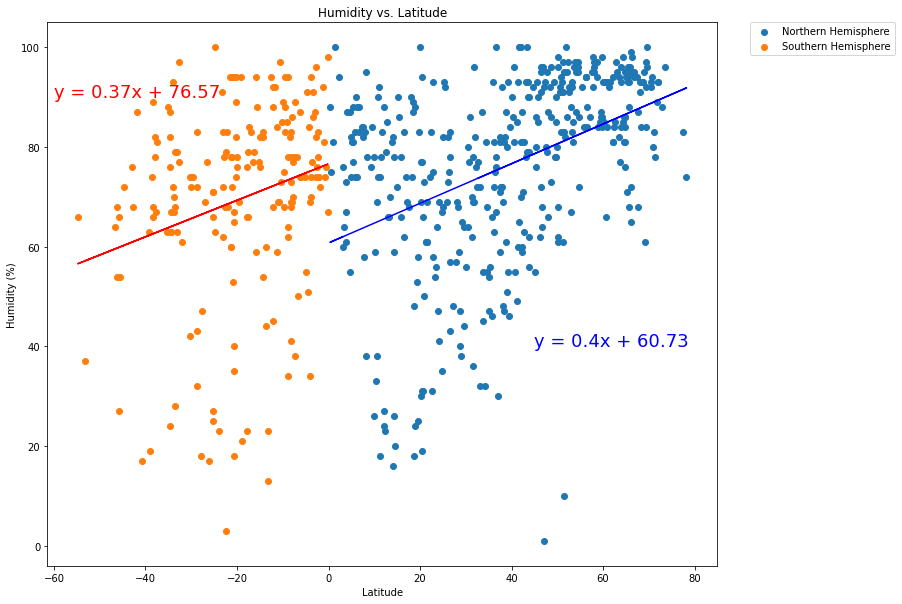

In [30]:
#Create Linear Regression
#Humidity
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(north['Lat'], 
                                                              north["Humidity"])
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(south['Lat'], 
                                                              south["Humidity"])
#Set x-values and regression values
north_x = north['Lat']
north_y = north_x*slope_n + intercept_n
south_x = south['Lat']
south_y = south_x*slope_s + intercept_s

#Set linear regression equation
north_eq = 'y = ' + str(round(slope_n, 2)) + "x + " + str(round(intercept_n, 2))
south_eq = 'y = ' + str(round(slope_s, 2)) + "x + " + str(round(intercept_s, 2))

#Set Plot Size
plt.figure(figsize = (12,10))

# Create scatter point and add linear regression model on top
plt.scatter(north['Lat'], north["Humidity"], label = "Northern Hemisphere")
plt.scatter(south['Lat'], south["Humidity"], label = "Southern Hemisphere")
plt.plot(north_x, north_y, 'b-')
plt.plot(south_x, south_y, 'r-')

# Add linear regression equation
plt.annotate(north_eq, (45, 40), fontsize=18, color='blue')
plt.annotate(south_eq, (-60, 90), fontsize=18, color='red')

# Add title
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Display Plot
plt.show()


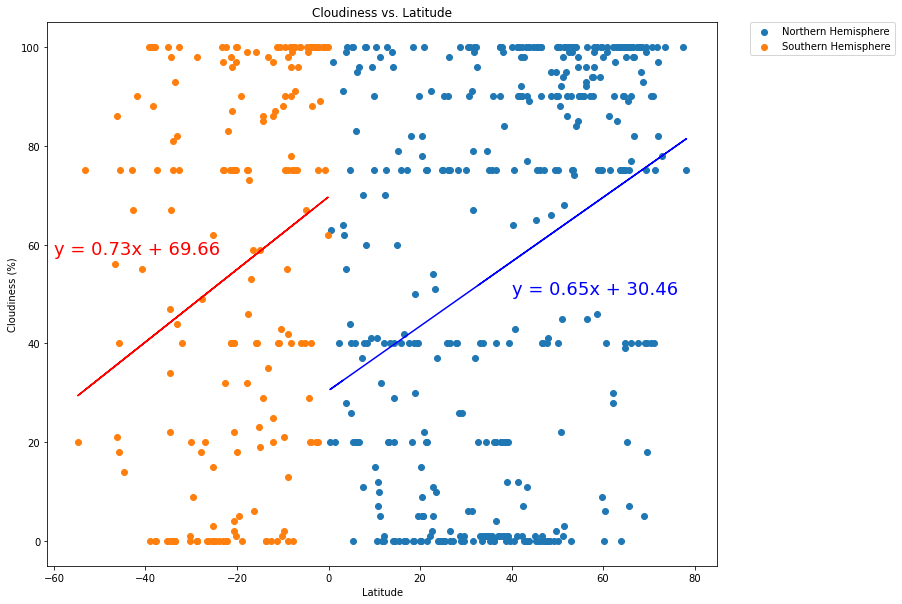

In [36]:
#Create Linear Regression
#Cloudiness
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(north['Lat'], 
                                                              north["Cloudiness"])
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(south['Lat'], 
                                                              south["Cloudiness"])
#Set x-values and regression values
north_x = north['Lat']
north_y = north_x*slope_n + intercept_n
south_x = south['Lat']
south_y = south_x*slope_s + intercept_s

#Set linear regression equation
north_eq = 'y = ' + str(round(slope_n, 2)) + "x + " + str(round(intercept_n, 2))
south_eq = 'y = ' + str(round(slope_s, 2)) + "x + " + str(round(intercept_s, 2))

#Set Plot Size
plt.figure(figsize = (12,10))

# Create scatter point and add linear regression model on top
plt.scatter(north['Lat'], north["Cloudiness"], label = "Northern Hemisphere")
plt.scatter(south['Lat'], south["Cloudiness"], label = "Southern Hemisphere")
plt.plot(north_x, north_y, 'b-')
plt.plot(south_x, south_y, 'r-')

# Add linear regression equation
plt.annotate(north_eq, (40, 50), fontsize=18, color='blue')
plt.annotate(south_eq, (-60, 58), fontsize=18, color='red')

# Add title
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Display Plot
plt.show()


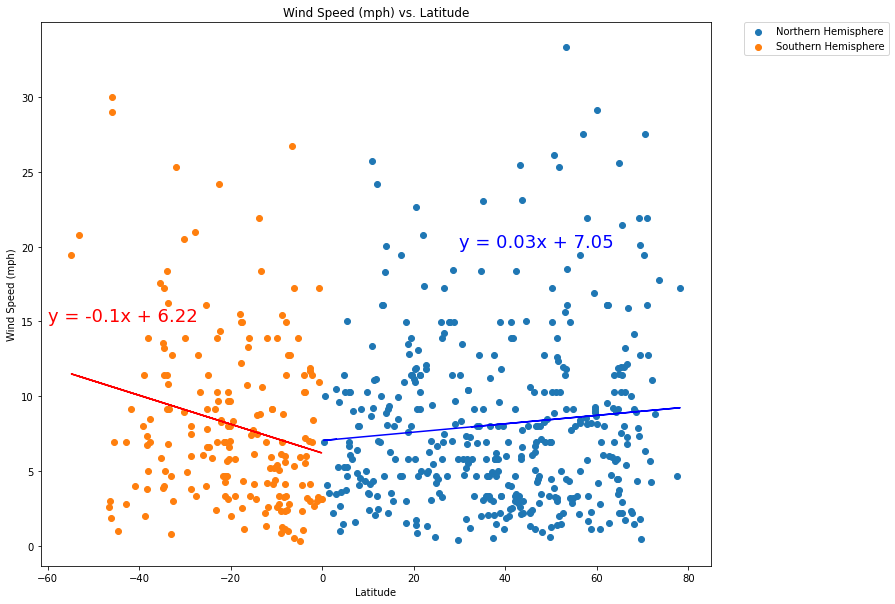

In [39]:
#Create Linear Regression
#Windspeed
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(north['Lat'], 
                                                              north["Wind Speed"])
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(south['Lat'], 
                                                              south["Wind Speed"])
#Set x-values and regression values
north_x = north['Lat']
north_y = north_x*slope_n + intercept_n
south_x = south['Lat']
south_y = south_x*slope_s + intercept_s

#Set linear regression equation
north_eq = 'y = ' + str(round(slope_n, 2)) + "x + " + str(round(intercept_n, 2))
south_eq = 'y = ' + str(round(slope_s, 2)) + "x + " + str(round(intercept_s, 2))

#Set Plot Size
plt.figure(figsize = (12,10))

# Create scatter point and add linear regression model on top
plt.scatter(north['Lat'], north["Wind Speed"], label = "Northern Hemisphere")
plt.scatter(south['Lat'], south["Wind Speed"], label = "Southern Hemisphere")
plt.plot(north_x, north_y, 'b-')
plt.plot(south_x, south_y, 'r-')

# Add linear regression equation
plt.annotate(north_eq, (30, 20), fontsize=18, color='blue')
plt.annotate(south_eq, (-60, 15), fontsize=18, color='red')

# Add title
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Display Plot
plt.show()


In [40]:
#Observations
#(1) Cities closer to the equation have a higher max temperature, we can see that the farther we move
# away from the latitude the temperature decrease whereas the temperature increase as we get close to latitude 
#(2) From latitude 60-80, the majority of the cities have a higher humidity %
#(3) From observation, cloudiness does not seem to have a relationship with latitude since no matter the latitude
# the cloudiness percentage ranges from 0-100
#(4) Majority of the cities' windspeed seem to ranges form 0-20 mph. As we move away from the equator, there seem 
# to be some cities with cases of higher wind speed (mph)